In [169]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import requests

from pandas import ExcelWriter
from pandas import ExcelFile

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier


In [170]:
#Load IBM HR data set

ibm_df = pd.read_csv("../MachineLearningProject/IBM-Watson.csv")
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [171]:
# Want to view all the column names in the original dataframe

originalheaders = ibm_df.dtypes.index
originalheaders

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [172]:
# Everyone here works 80hours in two weeks, so let's drop this column too

ibm_df["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [173]:
new_ibm_df = ibm_df.drop(columns=['DailyRate', 'EmployeeCount', 'StandardHours', 'EmployeeNumber', 'MonthlyIncome', 'MonthlyRate', 'Over18'])
new_ibm_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [174]:
#convert Yes values to 1 and No values to 0
new_ibm_df = new_ibm_df[(new_ibm_df["Attrition"] == "Yes") | (new_ibm_df["Attrition"] == "No")]
mapping_dictionary = {"Attrition": { "Yes": 1, "No": 0 } }
new_ibm_df = new_ibm_df.replace(mapping_dictionary)
new_ibm_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [175]:
# Convert ordinal value (businesstravel) to numeric
#mapping_dictionary_2 = {
#    "BusinessTravel": {
#        "Non-Travel": 1,
#        "Travel_Rarely": 2,
#        "Travel_Frequently": 3
#    }
#}

#new_ibm_df = new_ibm_df.replace(mapping_dictionary_2)
#new_ibm_df[["BusinessTravel"]].head()

In [176]:
# View updated dataframe
new_ibm_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2


In [177]:
# Want to view all the column names in the modified dataframe

newheaders = new_ibm_df.dtypes.index
newheaders

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [178]:
# Use describe function for the modified dataframe 
new_ibm_df.describe()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,2.693197,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,2.498009,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [179]:
# Check data quality
new_ibm_df.isnull().any().head()

Age                 False
Attrition           False
BusinessTravel      False
Department          False
DistanceFromHome    False
dtype: bool

In [180]:
# Encode nominal columns as dummy variables. The following columns have string elements
columns = ["BusinessTravel","Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
dummy = pd.get_dummies(new_ibm_df[columns])
dummy.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0


In [181]:
new_ibm_df = pd.concat([new_ibm_df, dummy], axis=1)
new_ibm_df = new_ibm_df.drop(columns, axis=1)
new_ibm_df.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1,2,2,94,3,2,4,8,...,0,0,0,1,0,0,0,1,0,1
1,49,0,8,1,3,61,2,2,2,1,...,0,0,1,0,0,0,1,0,1,0
2,37,1,2,2,4,92,2,1,3,6,...,0,0,0,0,0,0,0,1,0,1
3,33,0,3,4,4,56,3,1,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,0,2,1,1,40,3,1,2,9,...,0,0,0,0,0,0,1,0,1,0


In [182]:
new_ibm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 49 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    1470 non-null int64
TrainingTimesLastYear                1

In [183]:
# Export dataframe to CSV files
new_ibm_df.to_csv("cleaned_data.csv", index=False, encoding="utf-8")

In [184]:
# Re-read the data CSV file into pandas
IBM_df = pd.read_csv("cleaned_data.csv", encoding="utf-8")
IBM_df.head()

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1,1,2,2,94,3,2,4,8,...,0,0,0,1,0,0,0,1,0,1
1,49,0,8,1,3,61,2,2,2,1,...,0,0,1,0,0,0,1,0,1,0
2,37,1,2,2,4,92,2,1,3,6,...,0,0,0,0,0,0,0,1,0,1
3,33,0,3,4,4,56,3,1,3,1,...,0,0,1,0,0,0,1,0,0,1
4,27,0,2,1,1,40,3,1,2,9,...,0,0,0,0,0,0,1,0,1,0


In [185]:
# TESSA'S TRIAL!
# Delete "redundant" columns
# Delete the following columns: BusinessTravel_Travel_Rarely, OverTime_No, MaritalStatus_Single,JobRole_Sales Representative,
# Gender_Female, EducationField_Marketing, Department_Sales

IBM_df = new_ibm_df.drop(columns=[
    'BusinessTravel_Travel_Rarely', 
    'OverTime_No', 'MaritalStatus_Single', 
    'JobRole_Sales Representative', 
    'Gender_Female', 
    'EducationField_Marketing', 
    'Department_Sales'])
IBM_df.head()


,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,MaritalStatus_Divorced,MaritalStatus_Married,OverTime_Yes
0,41,1,1,2,2,94,3,2,4,8,...,0,0,0,0,0,0,1,0,0,1
1,49,0,8,1,3,61,2,2,2,1,...,0,0,0,0,0,1,0,0,1,0
2,37,1,2,2,4,92,2,1,3,6,...,0,1,0,0,0,0,0,0,0,1
3,33,0,3,4,4,56,3,1,3,1,...,0,0,0,0,0,1,0,0,1,1
4,27,0,2,1,1,40,3,1,2,9,...,0,1,0,0,0,0,0,0,1,0


In [186]:
# ALICIA'S TRIAL!
# Delete "redundant" columns
#IBM_df = new_ibm_df.drop(columns=[
#    'OverTime_No', 
#    'MaritalStatus_Divorced', 
#    'JobRole_Healthcare Representative', 
#    'Gender_Male', 
#    'EducationField_Human Resources', 
#    'Department_Human Resources'])


In [187]:
IBM_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 42 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
NumCompaniesWorked                   1470 non-null int64
PercentSalaryHike                    1470 non-null int64
PerformanceRating                    1470 non-null int64
RelationshipSatisfaction             1470 non-null int64
StockOptionLevel                     1470 non-null int64
TotalWorkingYears                    1470 non-null int64
TrainingTimesLastYear                1

In [188]:
# Want to view all the column names in the FINAL dataframe

FINALheaders = IBM_df.dtypes.index
FINALheaders

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'Department_Human Resources',
       'Department_Research & Development', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRol

In [189]:
data = IBM_df.drop("Attrition", axis=1) # independent variables "x"
target = IBM_df["Attrition"] # dependent variable "y"
print(data.shape, target.shape)

(1470, 41) (1470,)


In [190]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(target.values)
k = le.transform(target.values)
print(k)

[1 0 1 ... 0 0 0]


In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [192]:
# Feature names
feature_names = data.columns
print(feature_names)

#Outcome target names
target_names = ["1", "0"]

Index(['Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'Department_Human Resources', 'Department_Research & Development',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Healthcare Representative', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Sc

In [193]:
# The craziness begins here...

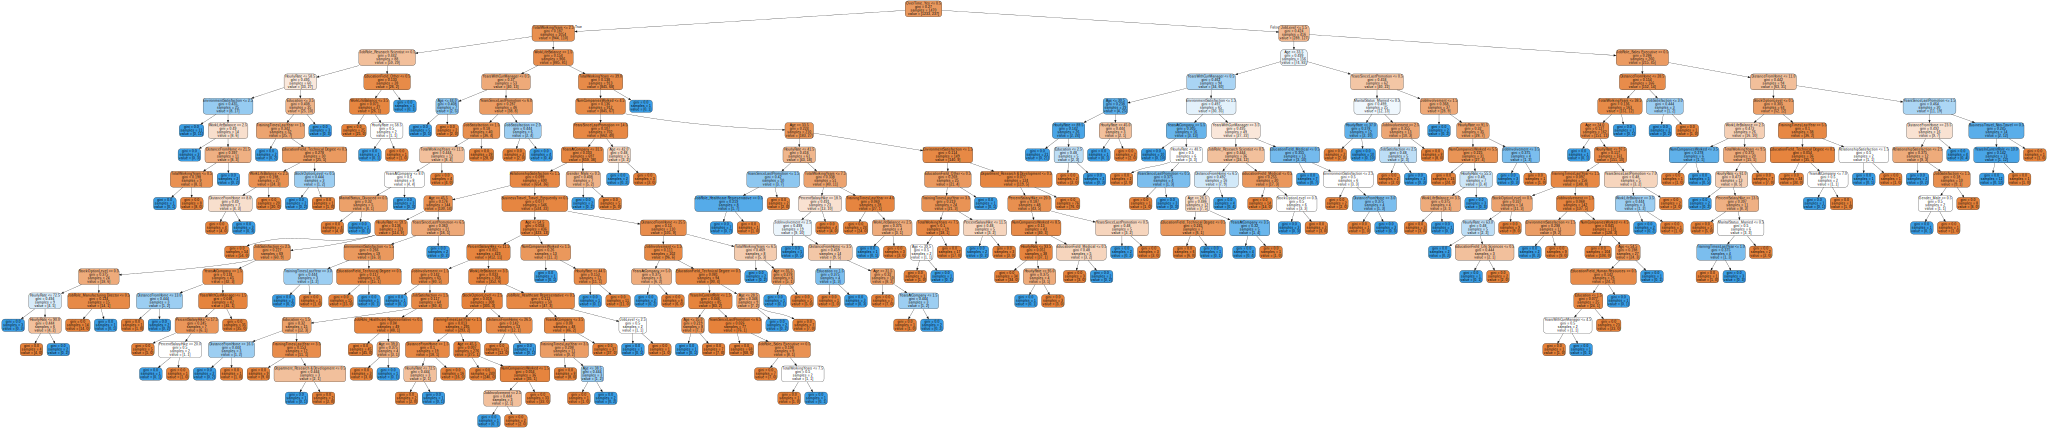

In [194]:
import graphviz

clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

dot_data = tree.export_graphviz(clf, out_file = None,
                                feature_names = feature_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [195]:
dotfile = open("tree.dot",'w')
dot_data = tree.export_graphviz(clf, out_file = dotfile)
dotfile.close()

In [196]:
import pydotplus

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')

TypeError: object of type 'NoneType' has no len()

In [ ]:
#from sklearn.tree import export_graphviz
#from sklearn import tree
#from os import system

#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(data, target)
#print(clf)

#dotfile = open("tree.dot",'w')
#dot_data = tree.export_graphviz(clf, out_file = dotfile)
#dotfile.close()

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('trial.png')

graph = graphviz.Source(dot_data)  
graph

In [ ]:
#import pydot

#(graph,) = pydot.graph_from_dot_file('tree.dot')
#graph.write_png('tree.png')

In [ ]:
# Just trying out other stuff here...

In [ ]:
#from sklearn.tree import DecisionTreeClassifier

#def plot_decision_regions(X_combined, y_combined, classifier, test_idx = None, resolution=0.02):
#    tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=0)
#    tree.fit(X_train, y_train)
#    X_combined = np.vstack((X_train, X_test))
#    y_combined = np.hstack((y_train, y_test))
#    plot_decision_regions(X_combined, y_combined, classifier = tree, test_idx = range(105,150))

plt.xlabel('xblah')
plt.ylabel('yblah')
plt.legend(loc='upper left')
plt.show()

In [ ]:
X_combined
#y_combined

In [ ]:
# Preprocess X data by scaling
# Train the scaler, which standardizes all features to have mean = 0

sc = StandardScaler()
sc.fit(X_train)

# Apply scaler to feature training data
X_train_std = sc.transform(X_train)

# Apply SAME scaler to feature test data
X_test_std = sc.transform(X_test)

print(X_train_std)

In [ ]:
# Implementing perceptron algorithm
# sklearn.linear_model.Perceptron

# Reference: http://damianmingle.com/perceptron-in-scikit-learn/

# The perceptron is a supervised learning algorithm which uses a set of function to learn from inputs to determine 
# if they belong to some class or not. It was one of the earliest machine learning techniques used and still is at 
# the center of many modern neural networks.

# Parameters:
# max_inter: int - max. number of passes (epochs) over the training set
# eta: float - learning rate (between 0.0 and 1.0)

# Create perceptron object
ppn = Perceptron(max_iter = 200, eta0 = 0.1, random_state = 0)

# Train the perceptron
ppn.fit(X_train_std, y_train)
print('Y array shape', y_test.shape)

In [ ]:
# Apply trained perceptron on features data to predictions for target test data

y_pred = ppn.predict(X_test_std)
print (y_pred)

# View model accuracy
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

In [ ]:
plt.plot()
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show()

In [ ]:
#plt.tight_layout()
#plt.savefig('./trial.png', dpi=300)

In [ ]:
# ~~Personal notes~~

#KMeans
#Logistic regression
#Random forest
#Decision trees - do this!
#Neural network - change features and see which are most important to monitor